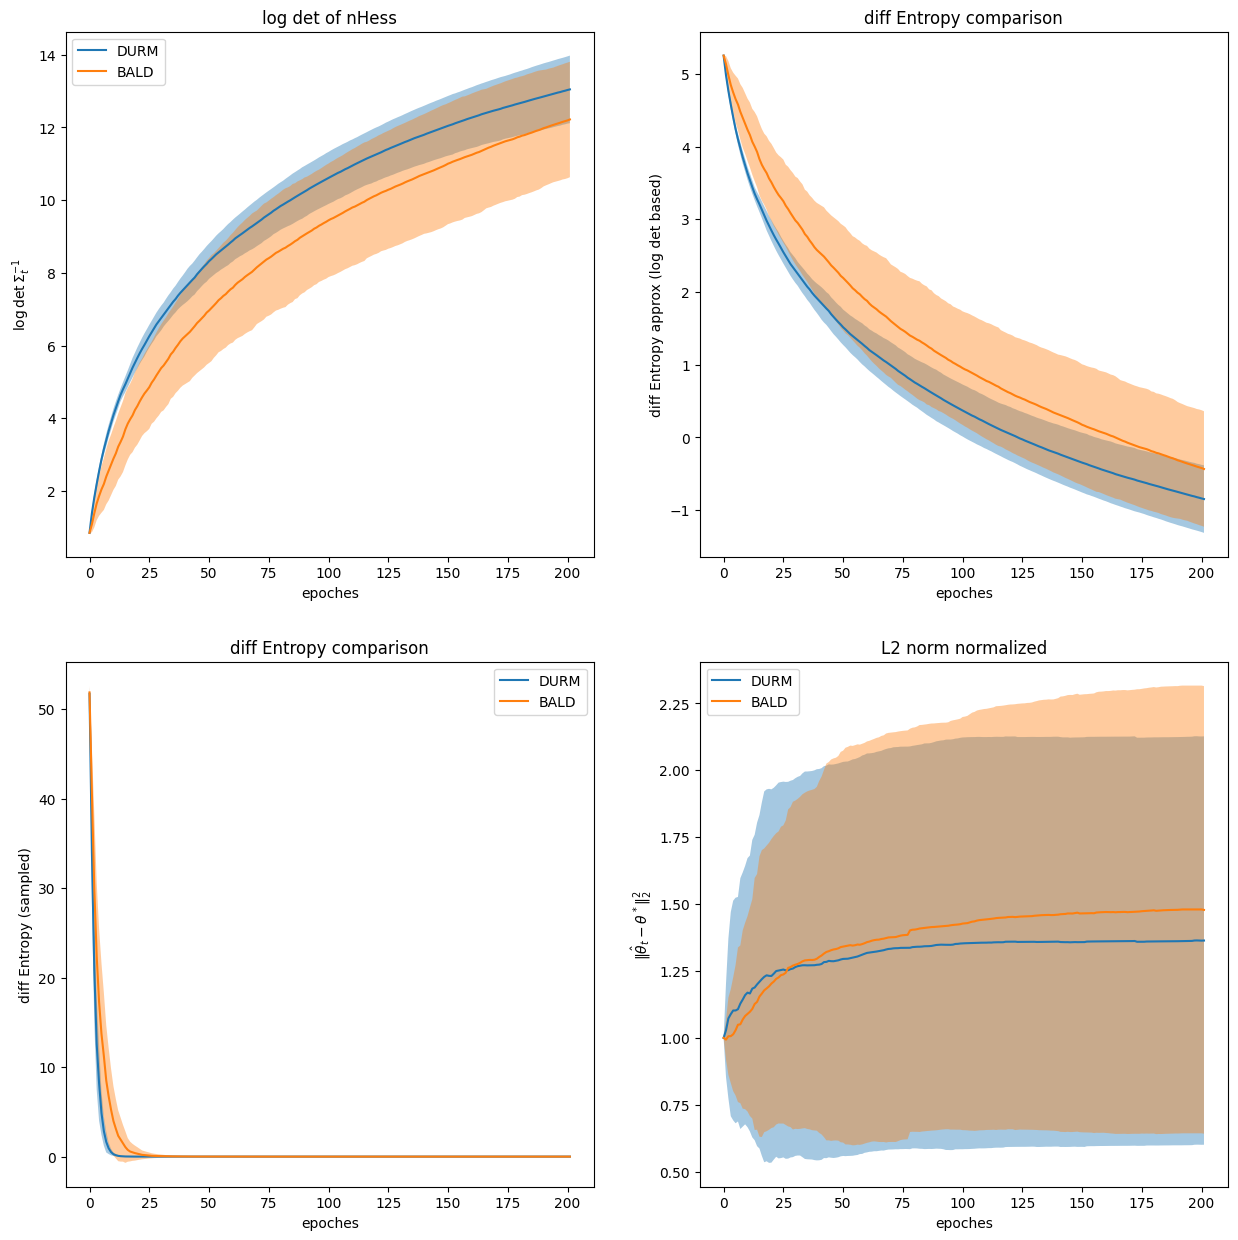

In [30]:
from utils.base import *
import numpy as np
import matplotlib.pyplot as plt
import os

def list_files_in_directory(directory_path):
    files = []
    for entry in os.listdir(directory_path):
        full_path = os.path.join(directory_path, entry)
        if os.path.isfile(full_path):
            files.append(full_path)
    return files

# log determinant 
# ent 
# log determinant_ent
# L2 norm
# --> 이 정도하면 될 것 같음!!

def get_result(directory_path, P) :
    files = list_files_in_directory(directory_path)
    Datas = []
    for file in files :
        Data = np.load(file,allow_pickle=True)
        dim = len(Data.item().get('nHess')[0])

        logdet = np.log(np.linalg.det(Data.item().get('nHess')))
        approx_diff_ent = 0.5 * (dim * np.log(2 * np.pi * np.e) - logdet)
        diff_ent = np.array(Data.item().get('ent'))
        
        
        idx = int(file.split('/')[-1].split('_')[0])
        L2_norm = np.sqrt(np.sum((Data.item().get('MAP') - P[idx])**2,axis=1))
        L2_norm = L2_norm/L2_norm[0]
        
        Datas.append([logdet, approx_diff_ent, diff_ent, L2_norm])
    
    Datas = np.array(Datas)
    
    log_det_mean, log_det_std = np.mean(Datas[:, 0, :],axis=0), np.std(Datas[:, 0, :],axis=0)
    approx_diff_ent_mean, approx_diff_ent_std = np.mean(Datas[:, 1, :],axis=0), np.std(Datas[:, 1, :],axis=0)
    diff_ent_mean, diff_ent_std = np.mean(Datas[:, 2, :],axis=0), np.std(Datas[:, 2, :],axis=0)
    L2_norm_mean, L2_norm_std = np.mean(Datas[:, 3, :],axis=0), np.std(Datas[:, 3, :],axis=0)

    return log_det_mean, log_det_std, approx_diff_ent_mean, approx_diff_ent_std, diff_ent_mean, diff_ent_std, L2_norm_mean, L2_norm_std

model_name = 'LN'
Algorithm_name = 'BALD'

directory_path = 'realworld_' + model_name + '_' + Algorithm_name
P = np.load('./params_realworld/Theta_' + model_name + '_4.npy')
get_result(directory_path, P)




def plot_result(model_name, Algorithm_names) :
    plt.figure(figsize= (15,15)) 
    for Algorithm_name in Algorithm_names :
        directory_path = 'realworld_' + model_name + '_' + Algorithm_name
        P = np.load('./params_realworld/Theta_' + model_name + '_4.npy')
        log_det_mean, log_det_std, approx_diff_ent_mean, approx_diff_ent_std, diff_ent_mean, diff_ent_std, L2_norm_mean, L2_norm_std = get_result(directory_path, P)
        
        
        
        plt.subplot(2,2,1)
        plt.plot(log_det_mean, label=Algorithm_name)
        plt.fill_between([t for t in range(len(log_det_mean))],log_det_mean - log_det_std, log_det_mean + log_det_std, alpha = 0.4)  
        
        plt.xlabel("epoches")
        plt.ylabel(r"$\log\det \Sigma_t^{-1}$")
        plt.title("log det of nHess")
        
        plt.legend()

        plt.subplot(2,2,2)
        plt.plot(approx_diff_ent_mean, label = Algorithm_name)
        plt.fill_between([t for t in range(len(approx_diff_ent_mean))],approx_diff_ent_mean - approx_diff_ent_std, approx_diff_ent_mean + approx_diff_ent_std, alpha = 0.4)  
        plt.xlabel("epoches")
        plt.ylabel("diff Entropy approx (log det based)")
        plt.title("diff Entropy comparison")

        plt.subplot(2,2,3)
        m = 0
        plt.plot([t + m for t in range(len(diff_ent_mean[m:]))], diff_ent_mean[m:], label =Algorithm_name)
        plt.fill_between([t + m for t in range(len(diff_ent_mean[m:]))], diff_ent_mean[m:] - diff_ent_std[m:], diff_ent_mean[m:] + diff_ent_std[m:], alpha = 0.4)  
        plt.xlabel("epoches")
        plt.ylabel("diff Entropy (sampled)")
        plt.title("diff Entropy comparison")
        plt.legend()

        plt.subplot(2,2,4)
        plt.plot(L2_norm_mean, label = Algorithm_name)
        plt.fill_between([t for t in range(len(L2_norm_mean))],L2_norm_mean - L2_norm_std, L2_norm_mean + L2_norm_std, alpha = 0.4)  

        plt.xlabel("epoches")
        plt.title("L2 norm normalized")
        plt.ylabel(r"$\Vert \hat{\theta}_t - \theta^* \Vert_2^2$")
        plt.legend()

    plt.savefig(model_name + '.pdf')

plot_result('MIRT',['DURM','BALD'])



In [17]:
model_name = 'MIRT'

MAP_0 =np.load('./params_synthetic/MAP_0_4dim_' + model_name + '.npy',)
nHess_0 = np.load('./params_synthetic/nHess_0_4dim_' + model_name + '.npy')
true_theta = np.load('./params_synthetic/true_theta_4dim_' + model_name + '.npy')
print(MAP_0)
print(nHess_0)
print(true_theta)

[-1 -3  3 -9]
[[0.4 0.  0.  0. ]
 [0.  0.3 0.  0. ]
 [0.  0.  0.2 0. ]
 [0.  0.  0.  0.1]]
[0. 0. 0. 0.]
